# Getting started with neural networks:
## Classification and regression

### Glossary
**Sample** or **input** -- A training example that we fit into the network\
**Prediction** or **output** -- A result that we get from the networks\
**Target** -- The objection that we try to predict.\
**Classes** -- \
**Label** --\
**Binary classification**\
**Multiclass classification**\
**Scalar regression**\
**Mini batch**

### Binary classification
#### Dataset

In [1]:
# all tensorflow keras buildin datasets
import tensorflow 
dir(tensorflow.keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [2]:
# load dataset
from tensorflow.keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

*num_word=10000* only keep the top 10000 most frequently appear in training samples

In [3]:
# decoding review back to text
word_idx = imdb.get_word_index()
reverse_word_idx = dict(
    [(value, key) for (key, value) in word_idx.items()])
decoded_review = ''.join(
    [reverse_word_idx.get(i - 3, '?') for i in X_train[0]])

#### Preparing the data

In [4]:
# we can't fit a list to neural network because of the length different
# so we have to convert a list to a tensor
X_train[:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

Encoding the int sequences via multi-hot encoding. **Multi hot encoding** is one of such popular encoding technique in order to successfully convert categorical variables into numerical variables.


In [5]:
import numpy as np
def vec_seq(sequences, dimension=10000):
    # creates an all-zero matrices
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1
            
    return results

# vectorize sequences (train data)
X_train_vec = vec_seq(X_train)
X_test_vec = vec_seq(X_test)

# vectorize sequences (labels data)
y_train_vec = np.asarray(y_train).astype('float32')
y_test_vec = np.asarray(y_test).astype('float32')

print(X_train_vec.shape)
print(y_test_vec.shape)

(25000, 10000)
(25000,)


### Build model
**Dense layers** or **Fully connected layers** -- A plain layer stack of nuerons (units)
- How many layers to use
- How many units to choose for each layers


#### Model definition

In [6]:
# import library
from tensorflow import keras
from tensorflow.keras.layers import Dense

model = keras.Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Metal device set to: Apple M1 Pro


2022-02-10 11:26:03.486832: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-10 11:26:03.487020: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


*16* mean this particular layers have 16 units stack on top of each other `(input_dimension, 16)` \
*activation='relu'* mean we use relu as the activation function : `relu(dot(Inputs, W) + b)`

#### Compile model
In compil, we need to choose an **optimizer**(what algorithms we use to optimize our model), **loss function**(fucntion that we use to calculate the loss, different between the predictions and the ground-truth, **metrics**(what are the metrice we use for measure how good our model is) for our neural network.

In [7]:
model.compile(
    optimizer = 'rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#### Validating
Split the datasets to Training set and Dev set to prevent **overfitting**(not generalize)

In [8]:
# setting aside a dev set (validation set)
X_dev = X_train_vec[:10000]
partial_X_train = X_train_vec[10000:]

y_dev = y_train_vec[:10000]
partial_y_train = y_train_vec[10000:]

#### Training the model
In order to train the model we use `keras.Sequential()` method `fit()`\
*epochs=20* means we train the model for 20 iterations over all samples in training example in mini-batches of *512*

In [9]:
history = model.fit(
    partial_X_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_dev, y_dev)
)

2022-02-10 11:26:08.273154: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20
 1/30 [>.............................] - ETA: 13s - loss: 0.6919 - accuracy: 0.5176

2022-02-10 11:26:08.549559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 30ms/step - loss: 0.5274 - accuracy: 0.7795 - val_loss: 0.4035 - val_accuracy: 0.8734
Epoch 2/20
 1/30 [>.............................] - ETA: 0s - loss: 0.3629 - accuracy: 0.9062

2022-02-10 11:26:09.426817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 14ms/step - loss: 0.3166 - accuracy: 0.9039 - val_loss: 0.3256 - val_accuracy: 0.8753
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2307 - accuracy: 0.9285 - val_loss: 0.2827 - val_accuracy: 0.8914
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1811 - accuracy: 0.9423 - val_loss: 0.3069 - val_accuracy: 0.8743
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1473 - accuracy: 0.9533 - val_loss: 0.3107 - val_accuracy: 0.8744
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1199 - accuracy: 0.9647 - val_loss: 0.3278 - val_accuracy: 0.8714
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1025 - accuracy: 0.9693 - val_loss: 0.3043 - val_accuracy: 0.8846
Epoch 8/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0835 - accuracy: 0.9767 - val_loss: 0.3318 - val_accuracy: 0.8837
Epoch 9/20
30/30 [======

In [10]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#### Plotting the result

In [11]:
# import library
import matplotlib.pyplot as plt

0.10186191264074296 0.4450590699911118


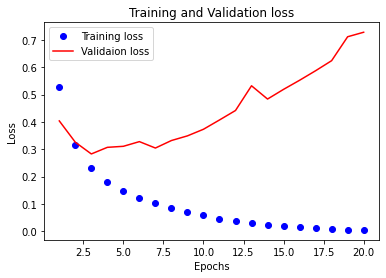

0.967480006814003 0.8733400404453278


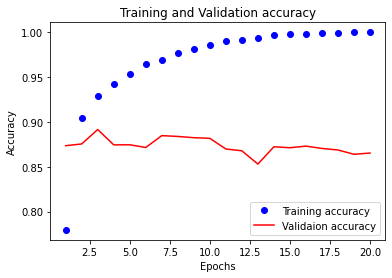

In [12]:
# training and validation loss
def loss_plot():
    loss_vals = history_dict['loss']
    dev_loss_vals = history_dict['val_loss']
    epochs = range(1, len(loss_vals)+1)
    print(np.mean(loss_vals), np.mean(dev_loss_vals))
    # plot
    plt.plot(epochs, loss_vals, 'bo', label='Training loss')
    plt.plot(epochs, dev_loss_vals, 'r', label='Validaion loss')
    plt.title("Training and Validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

def acc_plot():
    acc_vals = history_dict['accuracy']
    dev_acc_vals = history_dict['val_accuracy']
    epochs = range(1, len(acc_vals)+1)
    print(np.mean(acc_vals), np.mean(dev_acc_vals))

    # plot
    plt.plot(epochs, acc_vals, 'bo', label='Training accuracy')
    plt.plot(epochs, dev_acc_vals, 'r', label='Validaion accuracy')
    plt.title("Training and Validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    
loss_plot()
acc_plot()

#### Full process

In [13]:
# create model
model = keras.Sequential([
    Dense(64, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
# compile
model.compile(
    optimizer='rmsprop',
    loss='mse',
    metrics=['accuracy']
)
# fit and train
model.fit(
    partial_X_train,
    partial_y_train,
    epochs=10,
    batch_size=512,
    validation_data=(X_dev, y_dev)
)

Epoch 1/10
 1/30 [>.............................] - ETA: 12s - loss: 0.2510 - accuracy: 0.5059

2022-02-10 11:26:18.477873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 28ms/step - loss: 0.1581 - accuracy: 0.7759 - val_loss: 0.0996 - val_accuracy: 0.8745
Epoch 2/10
 1/30 [>.............................] - ETA: 0s - loss: 0.0747 - accuracy: 0.9277

2022-02-10 11:26:19.337639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 14ms/step - loss: 0.0778 - accuracy: 0.9031 - val_loss: 0.0872 - val_accuracy: 0.8826
Epoch 3/10
30/30 [==============================] - 0s 15ms/step - loss: 0.0533 - accuracy: 0.9347 - val_loss: 0.0919 - val_accuracy: 0.8775
Epoch 4/10
30/30 [==============================] - 0s 14ms/step - loss: 0.0420 - accuracy: 0.9489 - val_loss: 0.0915 - val_accuracy: 0.8763
Epoch 5/10
30/30 [==============================] - 0s 14ms/step - loss: 0.0336 - accuracy: 0.9590 - val_loss: 0.1067 - val_accuracy: 0.8608
Epoch 6/10
30/30 [==============================] - 0s 14ms/step - loss: 0.0285 - accuracy: 0.9649 - val_loss: 0.0954 - val_accuracy: 0.8777
Epoch 7/10
30/30 [==============================] - 0s 14ms/step - loss: 0.0230 - accuracy: 0.9729 - val_loss: 0.0992 - val_accuracy: 0.8751
Epoch 8/10
30/30 [==============================] - 0s 14ms/step - loss: 0.0194 - accuracy: 0.9782 - val_loss: 0.1050 - val_accuracy: 0.8724
Epoch 9/10
30/30 [======

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
0.10186191264074296 0.4450590699911118


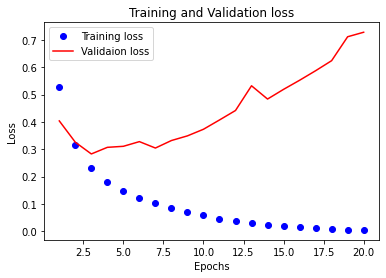

0.967480006814003 0.8733400404453278


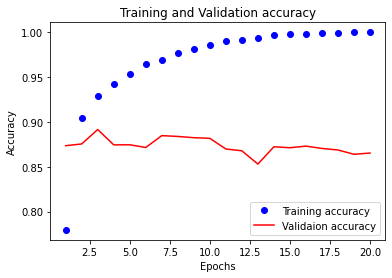

In [14]:
history_dict = history.history
print(history_dict.keys())

loss_plot()
acc_plot()

### Multiclasss classification
#### The reuters datasets
A set of short newswires and their topics, published by Reuters in 1986.

In [15]:
# import dataset
from tensorflow.keras.datasets import reuters

# load dataset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [16]:
print(f'Train size: {len(train_data)}')
print(f'Train shape: {train_data.shape}')

Train size: 8982
Train shape: (8982,)


In [17]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [18]:
# decode back to text 
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

decoded_newswire = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in X_train[0]]
)

In [19]:
decoded_newswire

'? vs from it as must exporters ability whole oil support slash trade 920 the officials he policy of its other as slightly against which continued ? and billion following 28 of dlr the into against stg ? results sold net the into becomes view reuter 38 s for result the west which it to 25 atlantic 1 vs from the differentials slack services the from inc prices 3 it as must s market dlrs for versus the from reuter completed reuter 3 it l 000 ? of were budget 3 said terms said government of the ensure besides it following trade 292 will the japan 3 it s special of its 30 but he total 1986 its stood will to from 3 analysts at they this of vs days it tonnes ? said the if over pulp dlrs policy the ? in aires of bills he inc as must them cts development crude loss in the ? rubber for february sales the held dlrs who quarter 2 duties lt cts international to any forthcoming 000 the further from on 12 them cts following of there be 005 000 but he at since after its february the further oil it s 

In [20]:
# prepare the data (vectorize the data)
X_train = vec_seq(train_data)
X_test = vec_seq(test_data)

In [21]:
# encoding labels to one hot encoder
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    
    for i, label in enumerate(labels):
        results[i, label] = 1
        
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [22]:
# using keras built-in function
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

print([i for i in y_train[0]])
print(f'Class of each sample: {len(y_train[0])}')

[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class of each sample: 46


#### Build model

In [33]:
model = keras.Sequential([
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(46, activation='softmax'),
])

Similar of the previous model activation, a plain network is counstruct by using `Dense` layer. The different is we use `softmax` activation function in the last layer.\ The reason we use 46 units is because of each of the training example have different 46 class.
**Softmax** activation function return a probabilities distribution of each class as an output.


#### Compile and Train

In [34]:
# compile the model
model.compile(
    optimizer="rmsprop",
     loss="categorical_crossentropy",
     metrics=["accuracy"])

In [35]:
# split train and dev set
# validation set
val_train = X_train[:1000]
val_labels = y_train[:1000]

# train set
partial_X_train = X_train[1000:]
partial_y_train = y_train[1000:]

In [36]:
# train model
history = model.fit(
            partial_X_train,
            partial_y_train,
            epochs= 20,
            batch_size=512,
            validation_data=(val_train, val_labels)
)

Epoch 1/20


2022-02-10 11:29:08.180152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 30ms/step - loss: 2.3282 - accuracy: 0.5750 - val_loss: 1.4729 - val_accuracy: 0.6910
Epoch 2/20
 1/16 [>.............................] - ETA: 0s - loss: 1.3579 - accuracy: 0.7207

2022-02-10 11:29:08.815226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 15ms/step - loss: 1.1625 - accuracy: 0.7502 - val_loss: 1.1301 - val_accuracy: 0.7670
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8262 - accuracy: 0.8221 - val_loss: 1.0019 - val_accuracy: 0.7960
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6179 - accuracy: 0.8747 - val_loss: 0.9312 - val_accuracy: 0.8070
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.4663 - accuracy: 0.9045 - val_loss: 0.9119 - val_accuracy: 0.8150
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.3585 - accuracy: 0.9232 - val_loss: 0.9923 - val_accuracy: 0.7820
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.2848 - accuracy: 0.9361 - val_loss: 0.8837 - val_accuracy: 0.8260
Epoch 8/20
16/16 [==============================] - 0s 14ms/step - loss: 0.2350 - accuracy: 0.9446 - val_loss: 0.9031 - val_accuracy: 0.8260
Epoch 9/20
16/16 [======

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
0.39596235901117327 1.0408688336610794


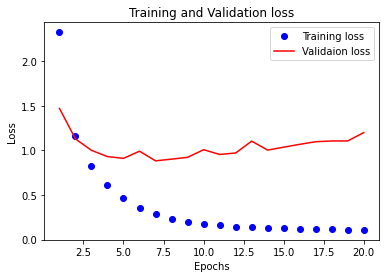

0.909972482919693 0.7994500398635864


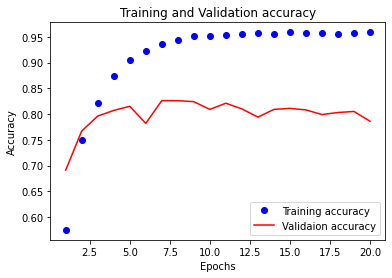

In [37]:
history_dict = history.history
print(history_dict.keys())

loss_plot()
acc_plot()

#### Retrian the model

In [43]:
model = keras.Sequential([
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(46, activation='softmax'),
])

model.compile(
    optimizer="rmsprop",
     loss="categorical_crossentropy",
     metrics=["accuracy"])

# train model
history = model.fit(
            partial_X_train,
            partial_y_train,
            epochs= 10,
            batch_size=512,
            validation_data=(val_train, val_labels)
)

result = model.evaluate(X_test, y_test)

Epoch 1/10


2022-02-10 11:34:32.838540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 26ms/step - loss: 2.4039 - accuracy: 0.5428 - val_loss: 1.5049 - val_accuracy: 0.6550
Epoch 2/10
 9/16 [===============>..............] - ETA: 0s - loss: 1.2923 - accuracy: 0.7094

2022-02-10 11:34:33.408646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 15ms/step - loss: 1.2583 - accuracy: 0.7139 - val_loss: 1.2654 - val_accuracy: 0.7320
Epoch 3/10
16/16 [==============================] - 0s 15ms/step - loss: 0.9126 - accuracy: 0.7959 - val_loss: 1.0669 - val_accuracy: 0.7650
Epoch 4/10
16/16 [==============================] - 0s 15ms/step - loss: 0.7010 - accuracy: 0.8429 - val_loss: 0.9876 - val_accuracy: 0.7880
Epoch 5/10
16/16 [==============================] - 0s 17ms/step - loss: 0.5255 - accuracy: 0.8875 - val_loss: 0.9644 - val_accuracy: 0.8050
Epoch 6/10
16/16 [==============================] - 0s 16ms/step - loss: 0.4044 - accuracy: 0.9164 - val_loss: 0.9874 - val_accuracy: 0.7960
Epoch 7/10
16/16 [==============================] - 0s 15ms/step - loss: 0.3137 - accuracy: 0.9305 - val_loss: 0.9963 - val_accuracy: 0.8030
Epoch 8/10
16/16 [==============================] - 0s 15ms/step - loss: 0.2666 - accuracy: 0.9405 - val_loss: 0.9913 - val_accuracy: 0.8110
Epoch 9/10
16/16 [======

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
0.7187372341752052 1.0798295080661773


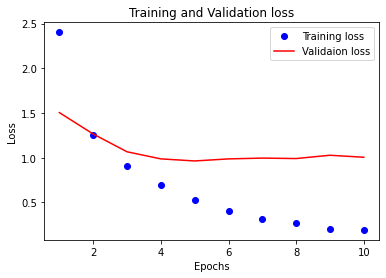

0.8472563743591308 0.7773000478744507


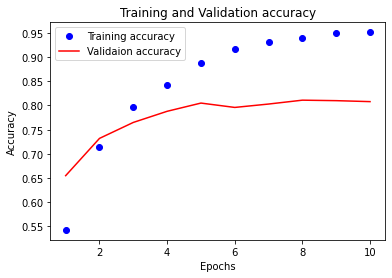

In [44]:
history_dict = history.history
print(history_dict.keys())

loss_plot()
acc_plot()

#### Predicting the test data

In [58]:
predictions = model.predict(X_test)
def check_prediction(index):
    print(f'Ground truth of sample {index} : {np.argmax(y_test[index])} ,\
    Prediction of sample {index} : {np.argmax(predictions[index])}')

In [61]:
check_prediction(19)

Ground truth of sample 19 : 3 ,    Prediction of sample 19 : 3


#### Different way to handle the labels and the loss
We also can use a sparse categorial as a labels

In [63]:
sparse_y_train = np.array(y_train)
sparse_y_test = np.array(y_test)

"""
model.compile(
    optimizer='rmsprop',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
"""

'\nmodel.compile(\n    optimizer=\'rmsprop\',\n    loss="sparse_categorical_crossentropy",\n    metrics=["accuracy"]\n)\n'

#### The bottleneck architecture
While try to compress the units so much it's may drop the performance dramatically. So we should avoid intermediate layers

In [66]:
model = keras.Sequential([
 Dense(64, activation="relu"),
 Dense(128, activation="relu"),
 Dense(32, activation="relu"),
 Dense(46, activation="softmax")
])

model.compile(
     optimizer="rmsprop",
     loss="categorical_crossentropy",
     metrics=["accuracy"])

model.fit(
     partial_X_train,
     partial_y_train,
     epochs=20,
     batch_size=128,
     validation_data=(val_train, val_labels))

Epoch 1/20


2022-02-10 11:51:57.661825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 2s 16ms/step - loss: 1.8968 - accuracy: 0.5877 - val_loss: 1.3027 - val_accuracy: 0.7040
Epoch 2/20
 1/63 [..............................] - ETA: 0s - loss: 1.4339 - accuracy: 0.6953

2022-02-10 11:51:58.778883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 1s 13ms/step - loss: 1.0469 - accuracy: 0.7610 - val_loss: 1.1205 - val_accuracy: 0.7450
Epoch 3/20
63/63 [==============================] - 1s 13ms/step - loss: 0.7304 - accuracy: 0.8366 - val_loss: 0.9864 - val_accuracy: 0.7950
Epoch 4/20
63/63 [==============================] - 1s 13ms/step - loss: 0.5136 - accuracy: 0.8855 - val_loss: 1.0000 - val_accuracy: 0.8120
Epoch 5/20
63/63 [==============================] - 1s 13ms/step - loss: 0.3739 - accuracy: 0.9144 - val_loss: 1.0429 - val_accuracy: 0.7990
Epoch 6/20
63/63 [==============================] - 1s 13ms/step - loss: 0.2928 - accuracy: 0.9361 - val_loss: 1.0536 - val_accuracy: 0.8030
Epoch 7/20
63/63 [==============================] - 1s 13ms/step - loss: 0.2359 - accuracy: 0.9449 - val_loss: 1.1323 - val_accuracy: 0.8000
Epoch 8/20
63/63 [==============================] - 1s 13ms/step - loss: 0.2029 - accuracy: 0.9483 - val_loss: 1.1437 - val_accuracy: 0.7880
Epoch 9/20
63/63 [======